# Project Proposal

## How Horsepower Varies Based on the Numbers of Cylinders in a Car Engine


## Introduction


There are many factors that determine the performance of a car. Previous research demonstrates that the engine efficieny is related to the volume and number of the cylinders (source). However, there are few and limited studies on the relationship between the number of cylinders and horsepower. In general, cars with different number of cylinders have different horsepower (Kellermayr, G. et al., 2019). We are interested in the different effects on horsepower between the cars with 4- and 6-cylinder engines. Our question is: "Do cars with 6-cylinder engines have higher horsepowers than cars with 4-cylinder engines?" We will answer this question by analysing the sample mean (the location statistics) and the standard deviation (the scale statistics) of the horsepower and how it differs with the number of cylinders in the samples.

Based on our question, our competeing hypotheses are (where μ represents the average horsepower):
- Null Hypothesis: There is no difference in horsepower between 4- and 6-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> = 0)
- Alternative Hypothesis: 6-cylinder engines have a greater horsepower than 4-cylinder engines (μ<sub>6-cyl</sub> − μ<sub>4-cyl</sub> > 0)

Our data set is the Auto MPG data set, which was obtained from Carnegie Mellon University's StatLib library. The 1983 American Statistical Association Exposition made use of this dataset. 

Attribute informations:

|Variables|Attribute|
|:---:|:---:|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|



## Preliminary Results


### Load Packages

In [1]:
library(tidyverse)
library(infer)
library(repr)
library(cowplot)
library(datateachr)
library(digest)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Load Data

In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", 
              "auto-mpg.data")

In [3]:
cars <- read.table("auto-mpg.data") 
head(cars)

,V1,V2,V3,V4,V5,V6,V7,V8,V9
,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>
1,18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165.0,3693,11.5,70,1,buick skylark 320
3,18,8,318,150.0,3436,11.0,70,1,plymouth satellite
4,16,8,304,150.0,3433,12.0,70,1,amc rebel sst
5,17,8,302,140.0,3449,10.5,70,1,ford torino
6,15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


### Clean And Wrangle The Data

1. Rename the variables and clean the data. The variable of horsepower is changed into a quantity variable, and the variable of the number of cylinders is changed into a categorical variable. Then, we delete the "NA" in the "mpg", "horsepower" and "acceleration" columns.

In [3]:
cars <- read.table("auto-mpg.data")%>%
    rename(mpg = V1,
           cylinders = V2,
           dispacement = V3,
           horsepower = V4,
           weight = V5,
           acceleration = V6,
           model = V7,
           origin = V8,
           name = V9) %>%
    mutate(horsepower = as.numeric(horsepower),
           cylinders = as.factor(cylinders))%>%
    filter(!is.na(mpg),
           !is.na(horsepower),
           !is.na(acceleration),
           cylinders %in% c(6,4))
head(cars)

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,mpg,cylinders,dispacement,horsepower,weight,acceleration,model,origin,name
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,24,4,113,95,2372,15.0,70,3,toyota corona mark ii
2,22,6,198,95,2833,15.5,70,1,plymouth duster
3,18,6,199,97,2774,15.5,70,1,amc hornet
4,21,6,200,85,2587,16.0,70,1,ford maverick
5,27,4,97,88,2130,14.5,70,3,datsun pl510
6,26,4,97,46,1835,20.5,70,2,volkswagen 1131 deluxe sedan


2. Select the columns relevant to our study and calculate the statistics we will use.

In [4]:
cars_variables <- cars %>% 
    select(cylinders, horsepower)
cars_summ_hp <- cars %>%
    group_by(cylinders) %>%
    summarize(size = n(),
              mean = mean(horsepower),
              sd = sd(horsepower),
              minimum = min(horsepower),
              lower_quartile = quantile(horsepower, 0.25),
              median = median(horsepower),
              upper_quartile = quantile(horsepower, 0.75),
              max = max(horsepower))
head(cars_variables)
cars_summ_hp

,cylinders,horsepower
,<fct>,<dbl>
1,4,95
2,6,95
3,6,97
4,6,85
5,4,88
6,4,46


cylinders,size,mean,sd,minimum,lower_quartile,median,upper_quartile,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,199,78.28141,14.52310,46,68.0,78,88,115
6,83,101.50602,14.31047,72,92.5,100,110,165


### Plot The Relevant Data

### Boxplot of The Cylinders And The Horsepower

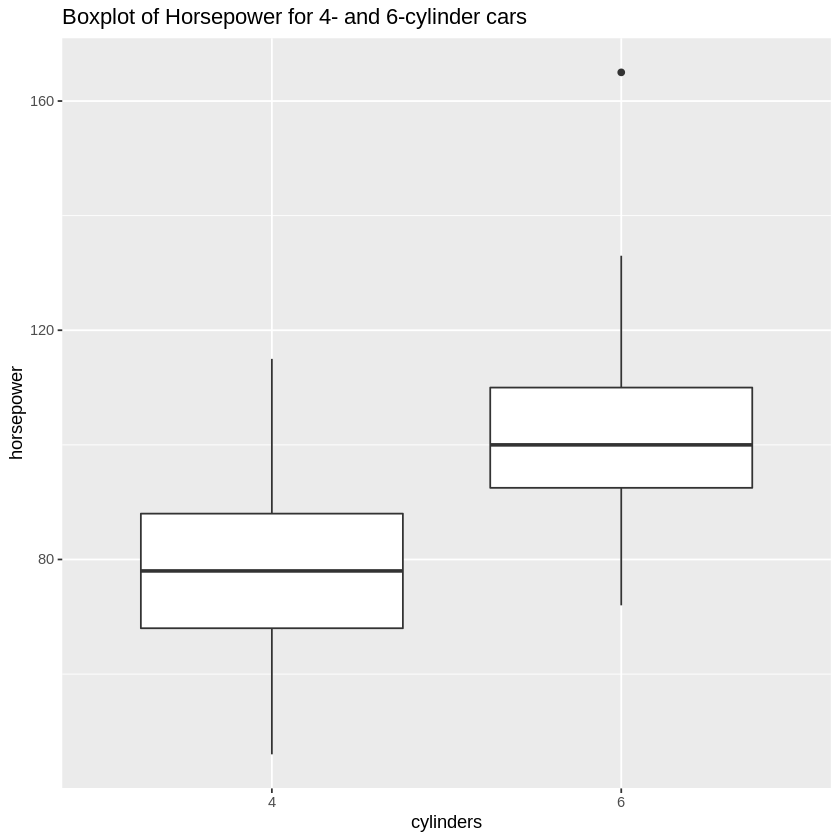

In [5]:
cars_boxplot <- cars %>%
    ggplot(aes(x= cylinders, y = horsepower)) +
    geom_boxplot()+
    ggtitle("Boxplot of Horsepower for 4- and 6-cylinder cars")
cars_boxplot

Because the standard deviation of horsepower of 4 cylinders is similar to the standard deviation horsepower of 6 cylinders, we decided to use the average horsepower of 4 cylinders and the average horsepower of 6 cylinders for the study.

### Bootstrap Sampling Distribution

1. 4 cylinder

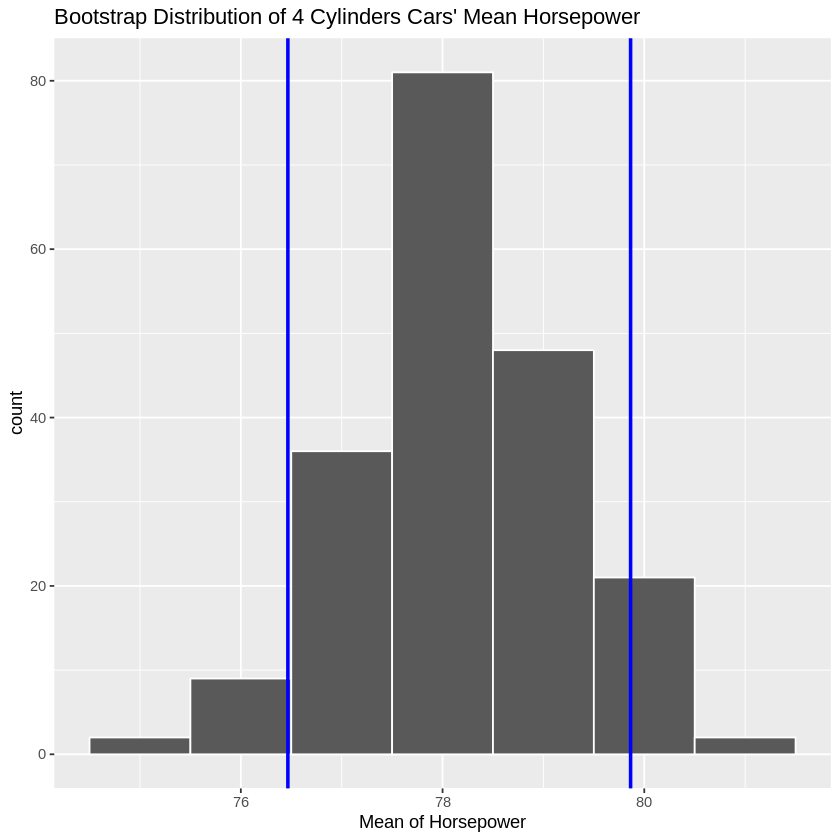

In [7]:
cars_bootstrapped1 <- cars %>%
    filter(cylinders == "4") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 199) %>%
    calculate(stat = "mean")

cars_ci1 <- cars_bootstrapped1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_4cylinders_plot <- cars_bootstrapped1 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci1[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci1[[2]], color = "blue", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 4 Cylinders Cars' Mean Horsepower")

cars_4cylinders_plot

2. 6 cylinder

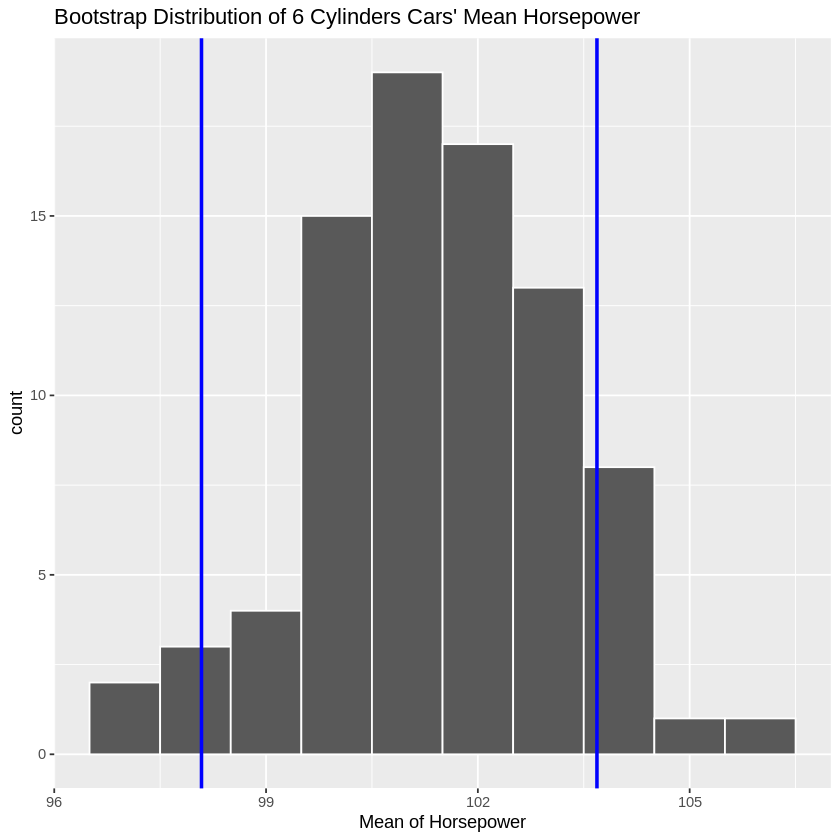

In [15]:
cars_bootstrapped2 <- cars %>%
    filter(cylinders == "6") %>%
    specify(response = horsepower) %>%
    generate(type = "bootstrap", reps = 83) %>%
    calculate(stat = "mean")

cars_ci2 <- cars_bootstrapped2 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

cars_6cylinders_plot <- cars_bootstrapped2 %>%
    ggplot(aes(x = stat)) +
    geom_histogram(binwidth = 1, color = "white") +
    geom_vline(xintercept = cars_ci2[[1]], color = "blue", size = 1) +
    geom_vline(xintercept = cars_ci2[[2]], color = "blue", size = 1) +
    xlab("Mean of Horsepower") +
    ggtitle("Bootstrap Distribution of 6 Cylinders Cars' Mean Horsepower")

cars_6cylinders_plot

## Method : Plan

## Reference

A. R. Millner, "Multi-hundred horsepower permanent magnet brushless disc motors," Proceedings of 1994 IEEE Applied Power Electronics Conference and Exposition - ASPEC'94, 1994, pp. 351-355 vol.1, doi: 10.1109/APEC.1994.316378.

Kellermayr, G., Schutting, E., &amp; Mitterecker, H. (2019). Turbocharging of engines with low cylinder numbers: A thermodynamic consideration. Automotive and Engine Technology, 4(3-4), 153–167. https://doi.org/10.1007/s41104-019-00048-8 